Setup

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

Access Dataset

In [55]:
Dataset_Dir = 'C:\\Users\\duwak\\Desktop\\CS3IP - Individual Project\\Code\\Dataset\\full_df.csv'
df_data = pd.read_csv(Dataset_Dir)
df_data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


Dataset Information

In [56]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

Generating the Dataset Images

In [57]:
images_path = 'C:\\Users\\duwak\\Desktop\\CS3IP - Individual Project\\Code\\Dataset\\preprocessed_images\\'
images = []
labels = []

for i, row in df_data.iterrows():
    left_image_path = images_path + row['Left-Fundus']
    right_image_path = images_path + row['Right-Fundus'] 

    if os.path.exists(left_image_path):
        left_img = tf.keras.preprocessing.image.load_img(left_image_path, target_size=(224, 224))
        left_img = tf.keras.preprocessing.image.img_to_array(left_img)
        images.append(left_img)
        labels.append(row['Left-Diagnostic Keywords'])

    if os.path.exists(right_image_path):
        right_img = tf.keras.preprocessing.image.load_img(right_image_path, target_size=(224, 224))
        right_img = tf.keras.preprocessing.image.img_to_array(right_img)
        images.append(right_img)
        labels.append(row['Right-Diagnostic Keywords'])

images = np.array(images)

plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Visualising the Fundus Images

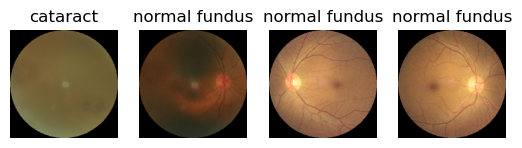

In [61]:
for i in range(4): 
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(labels[i])
    plt.axis("off")

plt.show()